In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_articles = pd.read_excel('date_preproc2.xlsx')
df_articles.head()

,date,title,link,annotation,authors,text,UDK,ESCI,GeoRef,ВАК,-,RSCI,WOS,AGRIS,PubMed,MathSciNet,Scopus,zbMATH,CAS,count_words
0,2019,Проблема обработки данных георадиолокационных ...,/article/n/problema-obrabotki-dannyh-georadiol...,в статье рассматривается проблема обработки да...,Поротова Варвара Петровна,﻿GEOLOGICAL AND MINERALOGICAL SCIENCES\nTHE PR...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,776
1,2019,Understanding and designing modern high-reliab...,/article/n/understanding-and-designing-modern-...,the purpose of this paper is to describe as Sp...,"Zemtsov Andrey Nikolaevich, Tran Dung Khanh",﻿TECHNICAL SCIENCES\nUNDERSTANDING AND DESIGNI...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1421
2,2019,разработка аутентификационной модели для обл...,/article/n/razrabotka-autentifikatsionnoi-mode...,рассмотрены методы и модели безопасного исполь...,"Вишняков Александр Сергеевич, Макаров Анатолии...",﻿DEVELOPMENT OF AUTHENTICATION MODEL FOR CLOUD...,УДК 331.225.3,0,0,0,1,0,0,0,0,0,0,0,0,2719
3,2019,Разработка модели информационных потоков в сис...,/article/n/razrabotka-modeli-informatsionnyh-p...,в данной работе представлена модель информаци...,Жуков Алексей Викторович,﻿DEVELOPMENT OF A MODEL OF INFORMATION FLOWS I...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,2256
4,2019,Автоматизированная система управления солнечны...,/article/n/avtomatizirovannaya-sistema-upravle...,в данной статье рассмотрена возможность приме...,Зеленцов Денис Сергеевич,﻿AUTOMATED CONTROL SYSTEM OF THE SOLAR AIR MAN...,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1132


1. В какие годы чаще всего писали статьи в этой выборке?

In [ ]:
df_articles

In [12]:
sorted(df_articles['date'].unique())

[1967,
 1973,
 1990,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

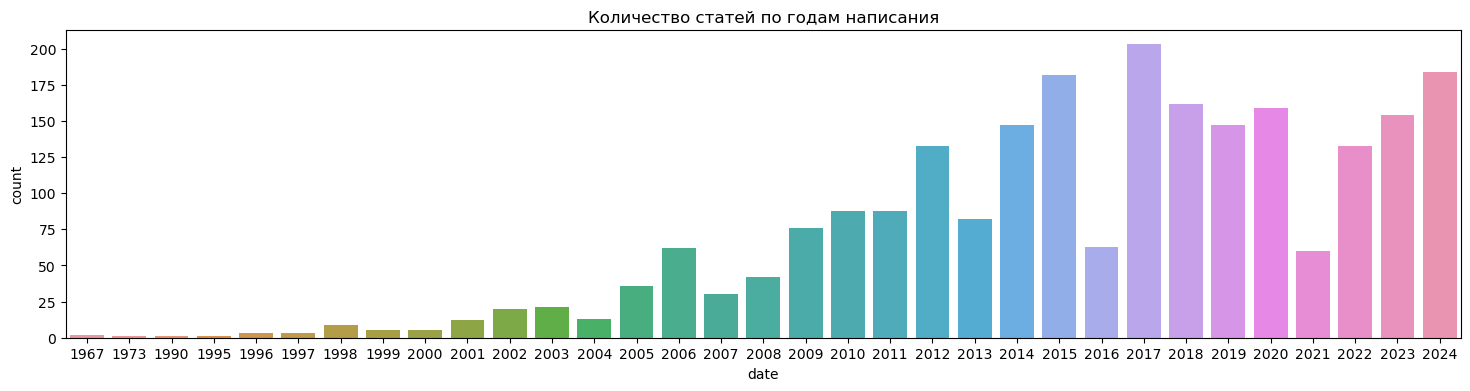

In [13]:
plt.figure(figsize=[18,4])
sns.countplot(data=df_articles, x='date', order=[1967, 1973, 1990, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 
              2004, 2005, 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024] )
plt.title('Количество статей по годам написания')
plt.show()

Видим, что чем раньше был год, тем меньше статей написано. Вполне правдоподобно, вряд ли многие авторы, писавшие статьи полвека назад, озаботились их переносом на сайт киберленинки.

Ближе к текущим дням больше всего статей было написано в 2017, 2015 и 2024.

2. Какая взаимосвязь между длиной статьи и годом написания?

[Text(0, 0, '2938'),
 Text(0, 0, '2914'),
 Text(0, 0, '2493.5'),
 Text(0, 0, '2478'),
 Text(0, 0, '2434.5'),
 Text(0, 0, '2406.5'),
 Text(0, 0, '2374'),
 Text(0, 0, '2298'),
 Text(0, 0, '2276'),
 Text(0, 0, '2076.5'),
 Text(0, 0, '2061'),
 Text(0, 0, '2025'),
 Text(0, 0, '2009.5'),
 Text(0, 0, '2001'),
 Text(0, 0, '1975.5'),
 Text(0, 0, '1944.5'),
 Text(0, 0, '1914.5'),
 Text(0, 0, '1912'),
 Text(0, 0, '1856.5'),
 Text(0, 0, '1844'),
 Text(0, 0, '1810.5'),
 Text(0, 0, '1776'),
 Text(0, 0, '1751.5'),
 Text(0, 0, '1747'),
 Text(0, 0, '1463'),
 Text(0, 0, '1433'),
 Text(0, 0, '1396'),
 Text(0, 0, '1336'),
 Text(0, 0, '1179'),
 Text(0, 0, '1067'),
 Text(0, 0, '608'),
 Text(0, 0, '396'),
 Text(0, 0, '267')]

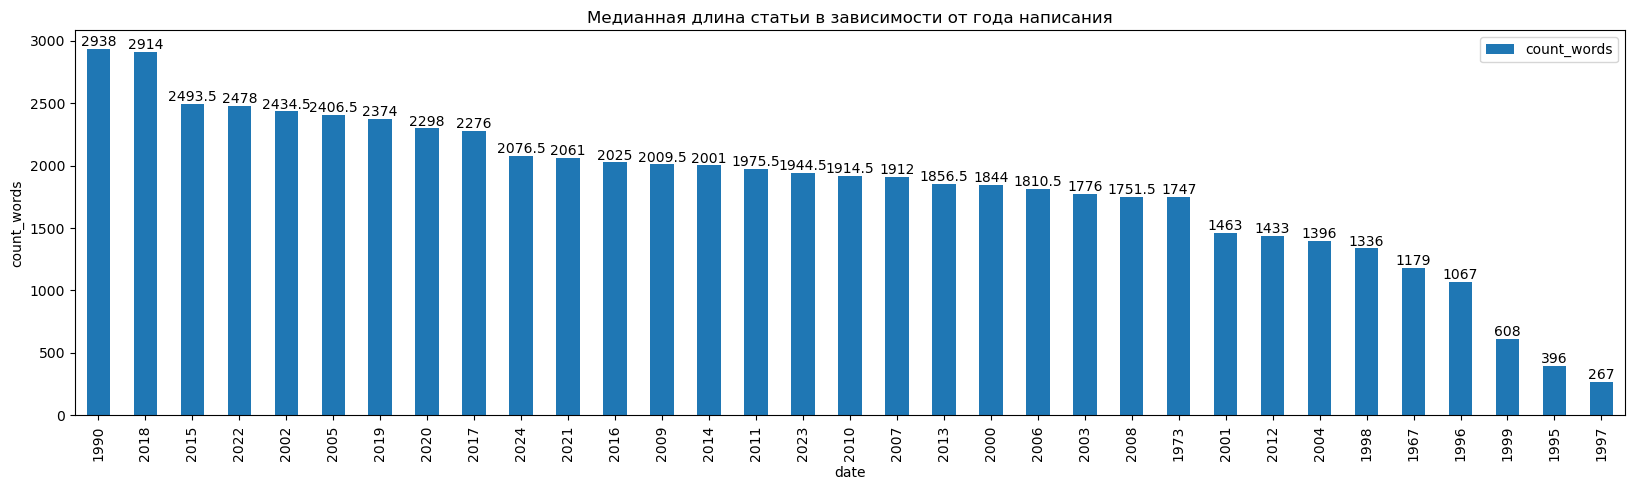

In [16]:
top_salary = df_articles[['count_words', 'date']].groupby('date').median().sort_values('count_words', ascending=False)
ax = top_salary.plot(kind='bar', title='Медианная длина статьи в зависимости от года написания',
                             xlabel='date',
                             ylabel='count_words',
                             figsize=[20,5])
ax.bar_label(ax.containers[0])

Самые длинные статьи писали в 1990 и 2018 годах.

В каких журналах больше всего публиковались?

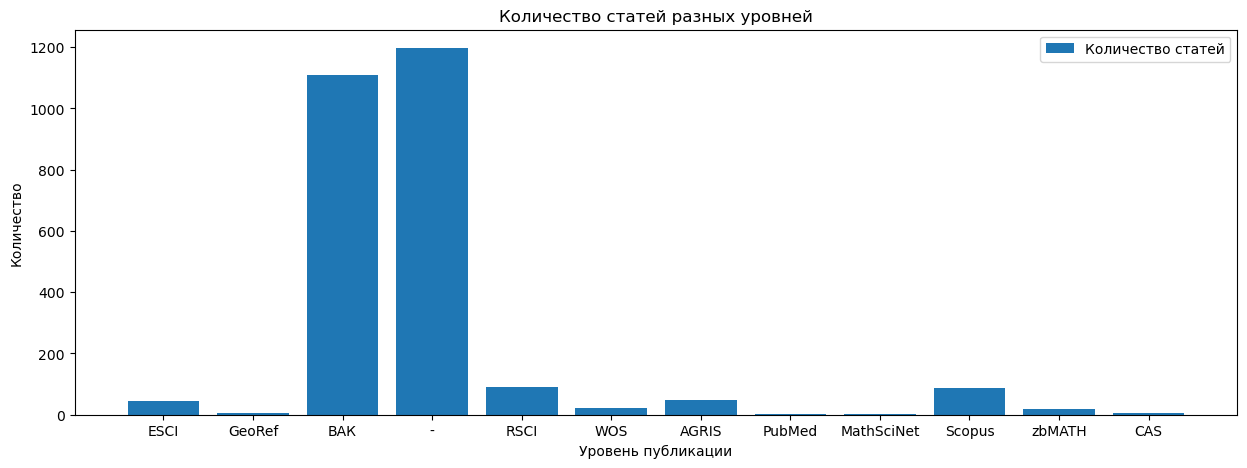

In [21]:
x = ['ESCI','GeoRef','ВАК','-','RSCI','WOS','AGRIS','PubMed','MathSciNet','Scopus','zbMATH','CAS']
y = [df_articles['ESCI'].sum(), df_articles['GeoRef'].sum(), df_articles['ВАК'].sum(),df_articles['-'].sum(), 
     df_articles['RSCI'].sum(), df_articles['WOS'].sum(), df_articles['AGRIS'].sum(), df_articles['PubMed'].sum(),
     df_articles['MathSciNet'].sum(),  df_articles['Scopus'].sum(),  df_articles['zbMATH'].sum(),  df_articles['CAS'].sum()]
plt.figure(figsize=(15,5))
plt.bar(x, y, label='Количество статей')
plt.xlabel('Уровень публикации')
plt.ylabel('Количество')
plt.title('Количество статей разных уровней')
plt.legend()

Больше всего статей в ВАК и без указания уровня. Меньше всего статей в узких областях, GeoRef (геология), PubMed(медицина) и т.д. Вполне объяснимо, учитывая, что я исследую данные на разделе "компьютерные и информационные науки"

Как взаимосвязаны уровни публикации статей?

#### Промежуточный вывод:
Я парсила сайт киберленинки по предметной области, где статьи автоматически сортируются в порядке убывания популярности. То есть мой датасет состоит из 2000 самых популярных статей, и достаточно старых статей, т.к судя по всему на сайте не выдают бОльший вес новым статьям.

Более правильно было бы выкачать все статьи которые там есть, и потом делать обработку случайного N-ного количества статей для получения репрезентативной выборки. Или выбирать номер запарсенной страницы случайным образом.

Та выборка которую собрала я для описательной статистики сейчас не репрезентативна.

Но я допишу на этих данных до какого-то логического завершения, прежде чем снова нырять в недры парсинга.